In [ ]:
!pip install numpy
!pip install pandas
!pip install scikit-learn

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    print(self)
    return ((self.endog), (self.exog, self.order, self.seasonal_order,self.trend,self.measurement_error,self.time_varying_regression,self.mle_regression,self.simple_differencing,self.enforce_stationarity,self.enforce_invertibility,self.hamilton_representation,self.concentrate_scale))


sm.tsa.statespace.SARIMAX.__getnewargs__ = __getnewargs__

In [ ]:
avocado = pd.read_csv(r"sample_data/avocado.csv",encoding= 'unicode_escape')

In [ ]:
avocado["Date"] = pd.to_datetime(avocado["Date"])

In [ ]:
avocado.shape


(18249, 14)

In [ ]:
# Numero de registros del dataset
print("Cantidad de registros:",len(avocado))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(avocado.columns))
# Tipos de datos del dataset
print("Tipo de datos:",avocado.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",avocado.shape)

Cantidad de registros: 18249
Cantidad de columnas: 14
Tipo de datos: [dtype('int64') dtype('<M8[ns]') dtype('float64') dtype('O')]
Filas y columnas: (18249, 14)


In [ ]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [ ]:
cols = ['Unnamed: 0', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']
avocado.drop(cols, axis=1, inplace=True)

In [ ]:
avocado = avocado.sort_values('Date')
avocado.isnull().sum()

Date            0
AveragePrice    0
dtype: int64

In [ ]:
avocado

Date  AveragePrice
11569 2015-01-04          1.75
9593  2015-01-04          1.49
10009 2015-01-04          1.68
1819  2015-01-04          1.52
9333  2015-01-04          1.64
...          ...           ...
8574  2018-03-25          1.36
9018  2018-03-25          0.70
18141 2018-03-25          1.42
17673 2018-03-25          1.70
8814  2018-03-25          1.34

[18249 rows x 2 columns]

In [ ]:
avocado = avocado.groupby('Date')['AveragePrice'].mean().reset_index()

In [ ]:
avocado

Date  AveragePrice
0   2015-01-04      1.301296
1   2015-01-11      1.370648
2   2015-01-18      1.391111
3   2015-01-25      1.397130
4   2015-02-01      1.247037
..         ...           ...
164 2018-02-25      1.359630
165 2018-03-04      1.350185
166 2018-03-11      1.335093
167 2018-03-18      1.313704
168 2018-03-25      1.346852

[169 rows x 2 columns]

In [ ]:
avocado = avocado.set_index('Date')
avocado.index

DatetimeIndex(['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25',
               '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22',
               '2015-03-01', '2015-03-08',
               ...
               '2018-01-21', '2018-01-28', '2018-02-04', '2018-02-11',
               '2018-02-18', '2018-02-25', '2018-03-04', '2018-03-11',
               '2018-03-18', '2018-03-25'],
              dtype='datetime64[ns]', name='Date', length=169, freq=None)

In [ ]:
avocado

AveragePrice
Date                    
2015-01-04      1.301296
2015-01-11      1.370648
2015-01-18      1.391111
2015-01-25      1.397130
2015-02-01      1.247037
...                  ...
2018-02-25      1.359630
2018-03-04      1.350185
2018-03-11      1.335093
2018-03-18      1.313704
2018-03-25      1.346852

[169 rows x 1 columns]

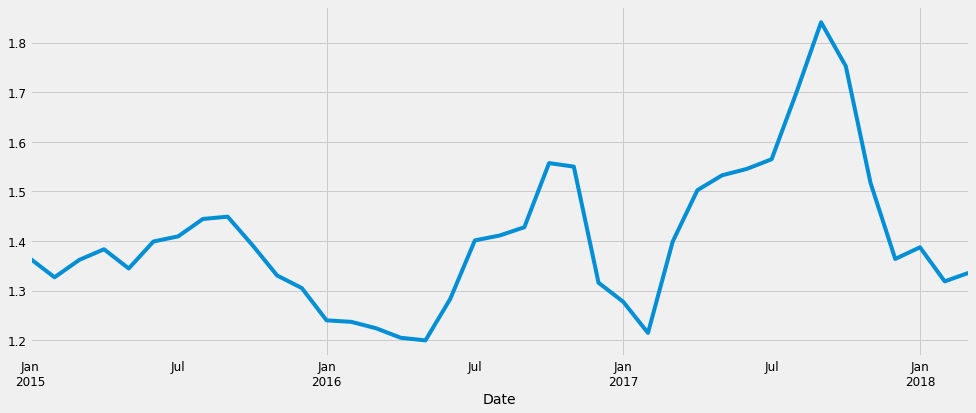

In [ ]:
y = avocado['AveragePrice'].resample('MS').mean()
y.plot(figsize=(15, 6))
plt.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:136.18154486739238
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1126.5624057995683
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-14.095350563396082
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-17.322629122491012


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-22.38536121971345
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-3.592557195142291
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:88.52560701366164


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1123.437744029415
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-29.76748463881819
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-33.11781319229628
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-36.41672541220059
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-16.493628216067023
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-71.80611229896692
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1052.9545502585604
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-34.32524767794453


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-41.60667491688473
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-38.834394340617735
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-22.420823790156007
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-73.06283533160483
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1126.4021278525274
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-31.021762996205226
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-43.526494183740006


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-37.347195485746695
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-22.612956699836786
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-72.6863728393432


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1177.517135726347
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-37.74817011465311
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-35.89692706221469
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-42.52838535208742
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-21.22560790275852
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-73.94073225771153


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1132.5945383621877
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-35.80328791495846
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-36.51293972878599


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-40.84872315532162


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-22.25264082296261
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-74.35883197771552
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1119.4537462132519
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-32.508572884842
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-39.25538183402487
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-37.82285218625512
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-18.5568780745273
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-71.09799883502306


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1121.7037495164022
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-28.92382572631916
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-38.80344082768195
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-35.34726173876962
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-18.01938079276648


In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
#print(results.summary().tables[1])
#print(results.summary())

In [ ]:
print(sm.__version__)

0.10.2


In [ ]:
results.save("Precio_Aguacate_Modelo.pkl")

##Evaluación

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)#2017-05-12
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AveragePrice')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.01


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.09


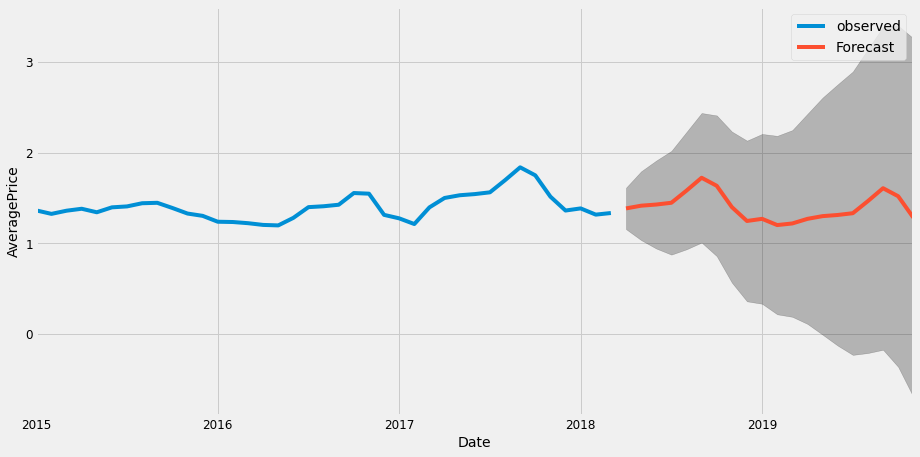

In [ ]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AveragePrice')
plt.legend()
plt.show()

In [ ]:
pred_ci

lower AveragePrice  upper AveragePrice
2018-04-01            1.158701            1.615936
2018-05-01            1.037718            1.796882
2018-06-01            0.944419            1.915808
2018-07-01            0.877169            2.022097
2018-08-01            0.935953            2.231378
2018-09-01            1.010570            2.440742
2018-10-01            0.860515            2.413788
2018-11-01            0.568344            2.235654
2018-12-01            0.361543            2.135575
2019-01-01            0.334794            2.209482
2019-02-01            0.218307            2.188515
2019-03-01            0.190512            2.251819
2019-04-01            0.112337            2.431714
2019-05-01           -0.006482            2.610496
2019-06-01           -0.127195            2.756836
2019-07-01           -0.229844            2.898525
2019-08-01           -0.209107            3.145853
2019-09-01           -0.173230            3.393957
2019-10-01           -0.361880            3.405597
2019-11-01           -0.692116            3.265528

##Resultados
El set de datos está bien ordenado y hay suficientes daots. Se utilizó un promedio de el precio del aguacate por meses.
El modelo puede ser usado para predecir el precio del aguacate.. Todo esto, con los steps, los cuales me indican los rangos de predicción.

In [ ]:
results.save("Precio_Aguacate_Modelo",False)

In [ ]:
import pickle
filename = 'PrecioAguacate'
pickle.dump(results, open(filename, 'wb'))

In [ ]:
import pandas as pd # Librería de tratamiento de datos

import pickle
# load the model from disk
loaded_model = pickle.load(open("/content/PrecioAguacate", 'rb'))
a = loaded_model.get_forecast(steps=50)
a.predicted_mean

2018-04-01    1.387318
2018-05-01    1.417300
2018-06-01    1.430113
2018-07-01    1.449633
2018-08-01    1.583666
2018-09-01    1.725656
2018-10-01    1.637152
2018-11-01    1.401999
2018-12-01    1.248559
2019-01-01    1.272138
2019-02-01    1.203411
2019-03-01    1.221166
2019-04-01    1.272026
2019-05-01    1.302007
2019-06-01    1.314821
2019-07-01    1.334340
2019-08-01    1.468373
2019-09-01    1.610364
2019-10-01    1.521859
2019-11-01    1.286706
2019-12-01    1.133266
2020-01-01    1.156845
2020-02-01    1.088118
2020-03-01    1.105873
2020-04-01    1.156733
2020-05-01    1.186714
2020-06-01    1.199528
2020-07-01    1.219048
2020-08-01    1.353080
2020-09-01    1.495071
2020-10-01    1.406566
2020-11-01    1.171413
2020-12-01    1.017974
2021-01-01    1.041552
2021-02-01    0.972825
2021-03-01    0.990580
2021-04-01    1.041440
2021-05-01    1.071422
2021-06-01    1.084235
2021-07-01    1.103755
2021-08-01    1.237787
2021-09-01    1.379778
2021-10-01    1.291273
2021-11-01 

In [ ]:
!python --version
import numpy
print(numpy.__version__)

Python 3.7.12
1.19.5
